In [1]:
#Import of all necessary packages
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import import_ipynb
import Plot_Functions as pf
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

importing Jupyter notebook from Plot_Functions.ipynb


In [2]:
#Read dataset from file to pandas dataframe
primary_df = pd.read_csv('Data\Avaluaci__de_sis__d_educaci__prim_ria.csv')
secondary_df = pd.read_csv('Data\Avaluaci__de_quart_d_Educaci__Secund_ria_Obligat_ria.csv')

#Data preprocessing: Eliminate duplicates and rename fields
primary_df = primary_df.drop_duplicates()
secondary_df = secondary_df.drop_duplicates()
primary_df.rename(columns={'PCAT': 'Catalan','PCAST': 'Spanish','PANG': 'English','PMAT': 'Mathematics','PMED': 'Sciences'}, inplace=True)
secondary_df.rename(columns={'PCAT': 'Catalan','PCAST': 'Spanish','PANG': 'English','PMAT': 'Mathematics','PCIEN': 'Sciences'}, inplace=True)

Some data preprocessing is needed in order to perform an accurate analysis. Namely:
-Dropping duplicates due to errors in the original dataset
-In french for secondary replacing marks with value 1 to NaN because in many cases people who did not perform the corresponding test where assigned 1 skewing the results. True 1 are statistically unlikely if possible at all as the grades go up to 100 and marks are usually assigned in larger intervals than 1.
-Renaming PMED in primary dataset to PCIEN, which is the equivalent subject in secondary in order ease the analysis.


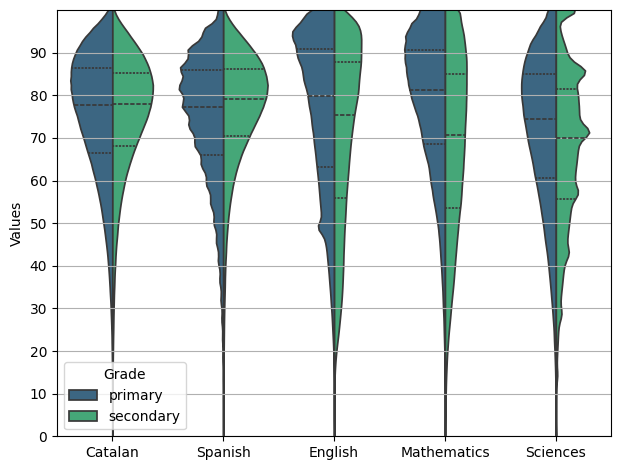

In [3]:
#Plot marks distribution of different subjects for primary and secondary
fields = list(['Catalan','Spanish','English','Mathematics','Sciences'])
pf.plot_violin_double(primary_df, secondary_df, fields)

Here we can see that the distributin of the general marks for the subjects we will bee studying. Allong with the median and the 25% and 75% quantiles. We can see that catalan and spanish ha a generally concentrated distribution while the other subjects, have a much heavier tale which suggests a very uneven knowledge of these subjects among the students. This phenomenon is even more pronounced in secondary school, specially in math and english.

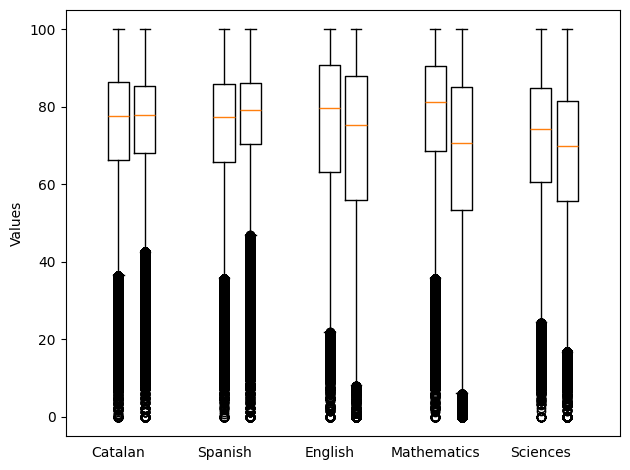

In [4]:
#Plot boxplot of different subjects for primary and secondary
pf.plot_boxes_double(primary_df, secondary_df, fields)

Here we can see a box plot of the same data with the same quantiles. We can also see how, for all subjects in both grades there are outliers at the lower end but no outliers at the higher end. This information is in aggreement with what we could see in the previous graph. The boxes make even clearer 

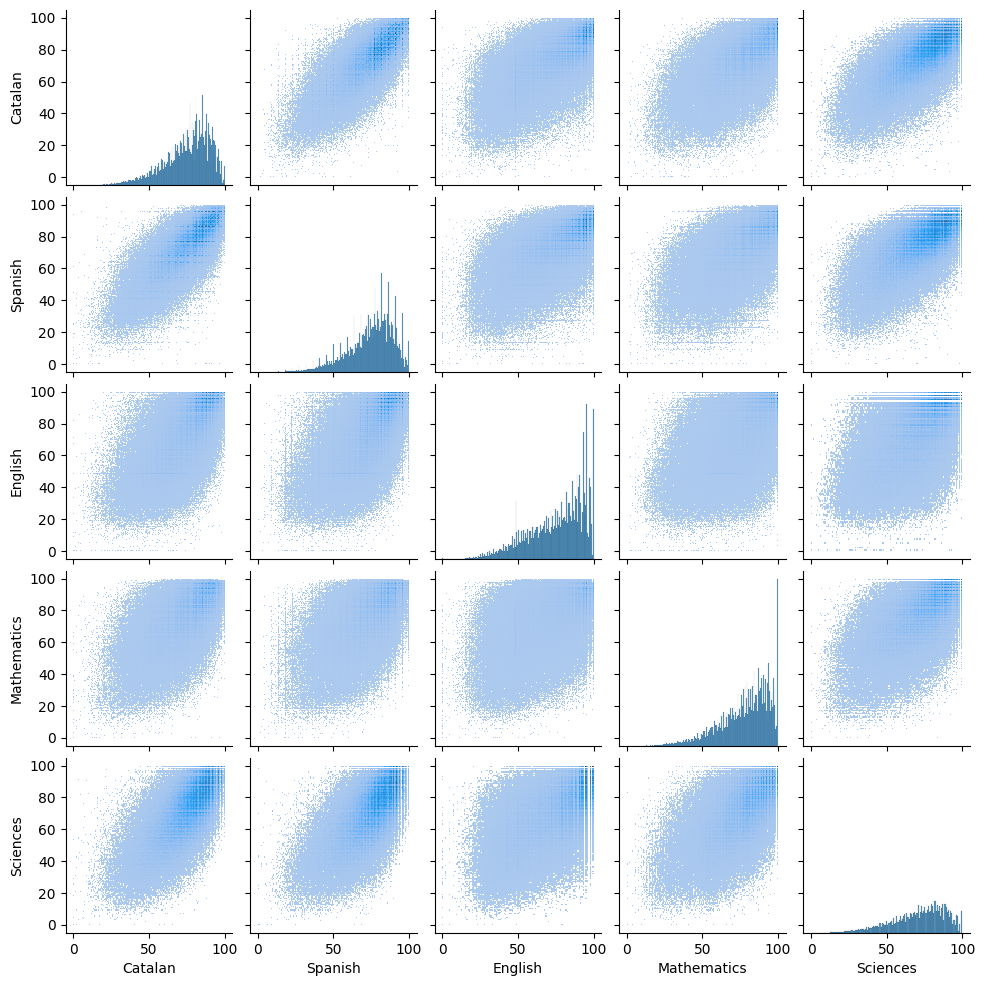

In [5]:
#Plot histograms of differents subjects for primary
sns.pairplot(primary_df[fields],kind='hist',size = 2, palette='viridis');

Here we can see the histograms of the the marks of students for each subject pair in primary school.
We can see that some subjects appear more correlated than others. It is also noticeable the fact that correlations appear to be stronger the higher the marks are, meaning that students that perform really well in one subject usually perform really well in the others.

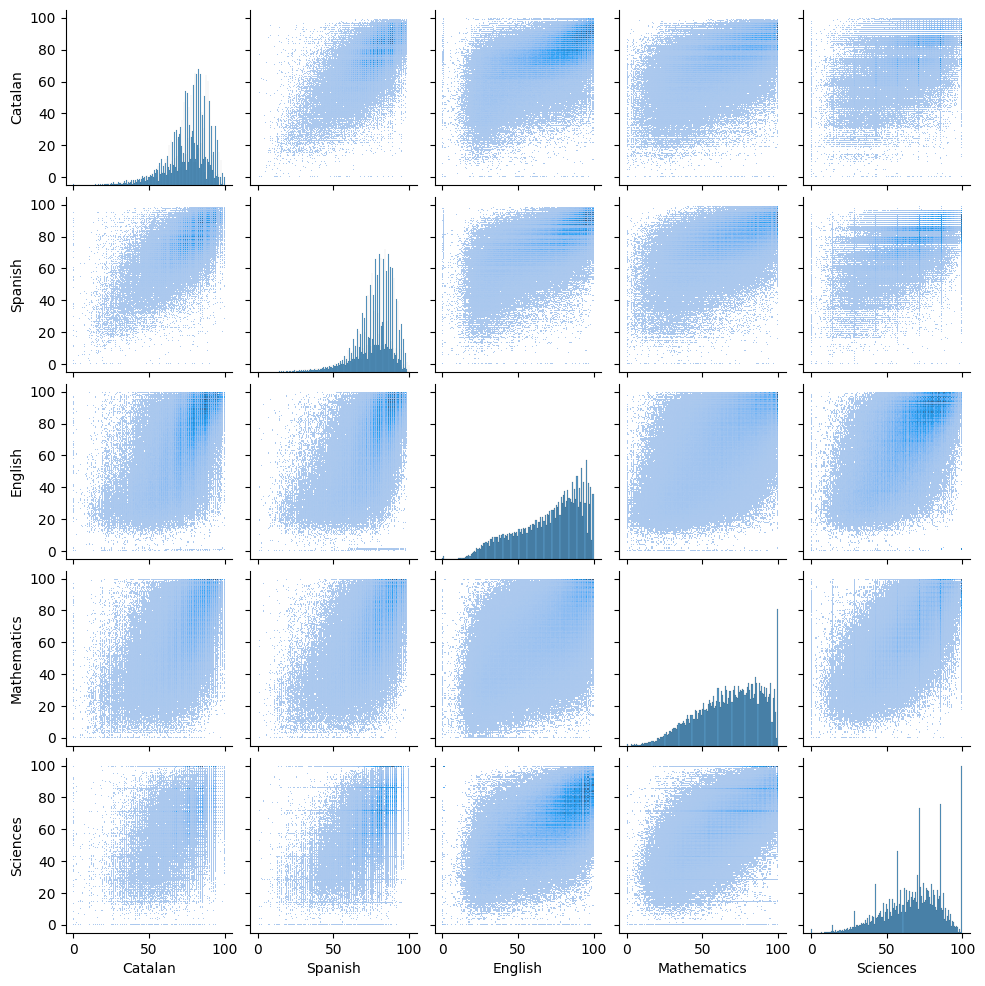

In [6]:
#Plot histograms of differents subjects for secondary
sns.pairplot(secondary_df[fields],kind='hist',size=2, palette='viridis');

Here we can see the histograms of the the marks of students for each subject pair in secondary school.
We can also see the same effect at higher marks than in the previous graph.

              Catalan   Spanish   English  Mathematics  Sciences
Catalan      1.000000  0.772279  0.674848     0.639542  0.694708
Spanish      0.772279  1.000000  0.645918     0.613153  0.677703
English      0.674848  0.645918  1.000000     0.560224  0.593863
Mathematics  0.639542  0.613153  0.560224     1.000000  0.624324
Sciences     0.694708  0.677703  0.593863     0.624324  1.000000


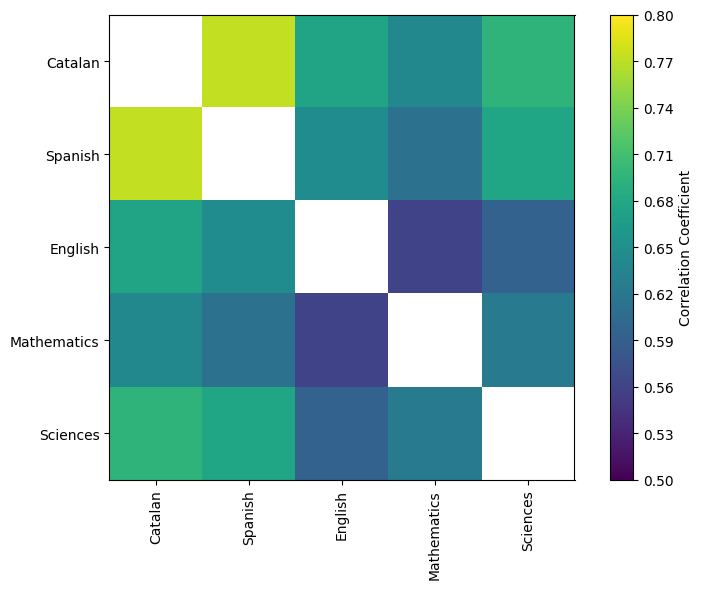

In [7]:
#Plot spearman correlation between different subjects of primary
corr_type = 'pearson'
pf.plot_corr_single(primary_df, fields, corr_type)

This graph show the linear correlation between global marks of the different subjects in primary.
We can see that all correlations are positive as expected. Their values fall between 0.5 and 0.8 
We can also see that the highest correlation is that between catalan and spanish.
It is also noticeable that marks in catalan are in primary school the better indicator of overall performance, this can have multiple interpretations, from the socio-economical distribution of people according to their primary language to the effects the fact that most subjects are taught in catalan, further data should be considered in order to reach a definite conclusion.
We can see that correlation of catalan, and spanish with other languages are much higher thant those of maths and english.

              Catalan   Spanish   English  Mathematics  Sciences
Catalan      1.000000  0.678930  0.623502     0.571860  0.519466
Spanish      0.678930  1.000000  0.638132     0.575665  0.546948
English      0.623502  0.638132  1.000000     0.626134  0.620160
Mathematics  0.571860  0.575665  0.626134     1.000000  0.685661
Sciences     0.519466  0.546948  0.620160     0.685661  1.000000


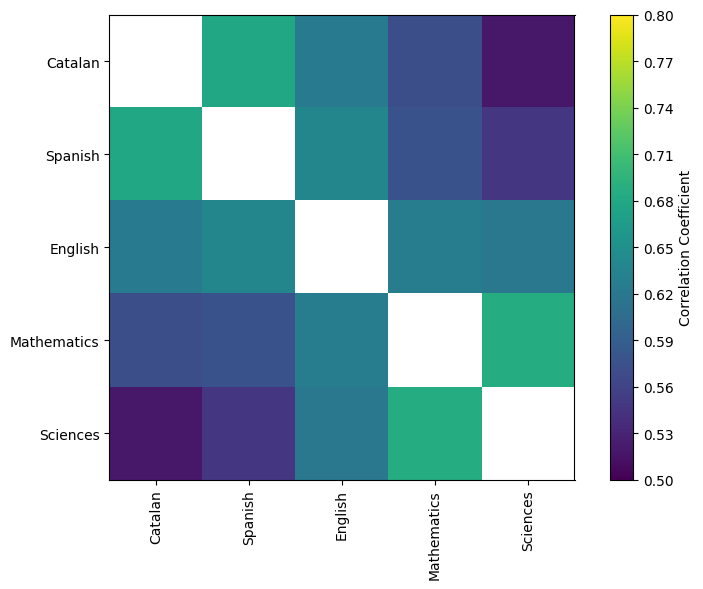

In [8]:
#Plot spearman correlation between different subjects of secondary
pf.plot_corr_single(secondary_df, fields,corr_type)

This graph show the linear correlation between global marks of the different subjects in secondary.
We can see that all correlations are positive as expected. Their values fall between 0.5 and 0.8.
We can also see that the highest correlation is that between catalan and spanish.
Here we can see a patthern emerge whereby language subjects and math/sciences have a much larger correlation amongst themselves than between each other. The stronger correlations here are between catalan and spanish and between maths and sciences while sciences and catalan and sciences and spanish are the lowest ones.

              Catalan   Spanish   English  Mathematics  Sciences
Catalan      0.000000  0.093349  0.051347     0.067683  0.175242
Spanish      0.093349  0.000000  0.007786     0.037488  0.130754
English      0.051347  0.007786  0.000000    -0.065910 -0.026297
Mathematics  0.067683  0.037488 -0.065910     0.000000 -0.061337
Sciences     0.175242  0.130754 -0.026297    -0.061337  0.000000 
 
               Catalan   Spanish   English  Mathematics  Sciences
Catalan     -0.000000 -0.093349 -0.051347    -0.067683 -0.175242
Spanish     -0.093349 -0.000000 -0.007786    -0.037488 -0.130754
English     -0.051347 -0.007786 -0.000000     0.065910  0.026297
Mathematics -0.067683 -0.037488  0.065910    -0.000000  0.061337
Sciences    -0.175242 -0.130754  0.026297     0.061337 -0.000000


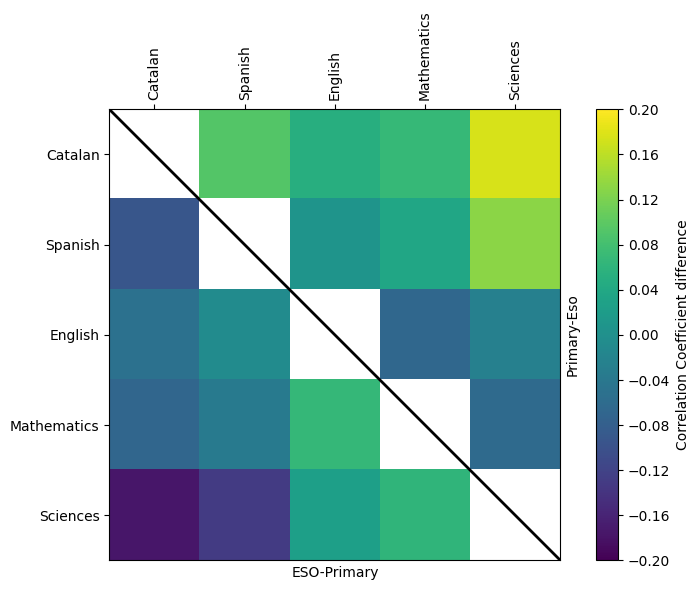

In [9]:
#Plot spearman difference in correlation between different subjects from primary to secondary
pf.plot_corr_dif_double(primary_df, secondary_df, fields, corr_type)

This graph shows the variaton in correlation from primary to secondary school.
We can see that there is a general drop in correlation from primary to secondary school, specially between sciences/catalan and sciences/spanish. There is however an increase in correlation between math/sciences and math/english.
This can be explained by the especialization of the subjects. Having more specialized knowledge in one subject does not necessarily translate into other subjects specially if subjects are really different.
In connected subjects, such as science and math, a significant part of the former relias in a solid base on the latter. This also happens in subjects with very similar competency requirements such as catalan and spanish.

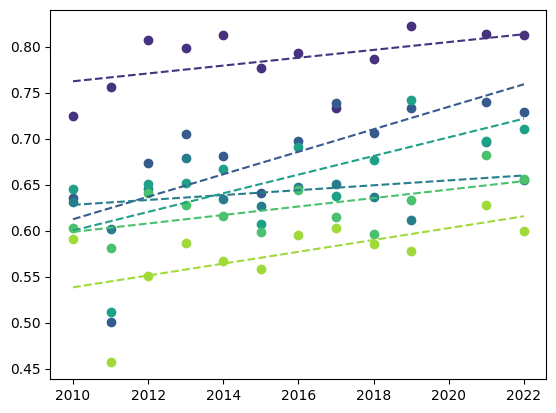

In [10]:
#Plot evolution of correlation for primary
fields = list(['Catalan','Spanish','English','Mathematics'])
years = primary_df['ANY'].unique()
condition = years != 2009
years = years[condition]
pf.plot_scatter_years(primary_df,fields,years,False,corr_type)


We have aliminated correlation values of science as we only have data for the last 3 years. Data from 2020 is missing, probably due to covid.
This graph shows the correlation between subject marks in primary, we can see all show an increase, although for catalan/math it is almost flat. 
However, for all correlations with english there is a very strong dip in 2011 which may skew the trend. This may be due to inconsistencies in the english test, its grading method or even transcription.

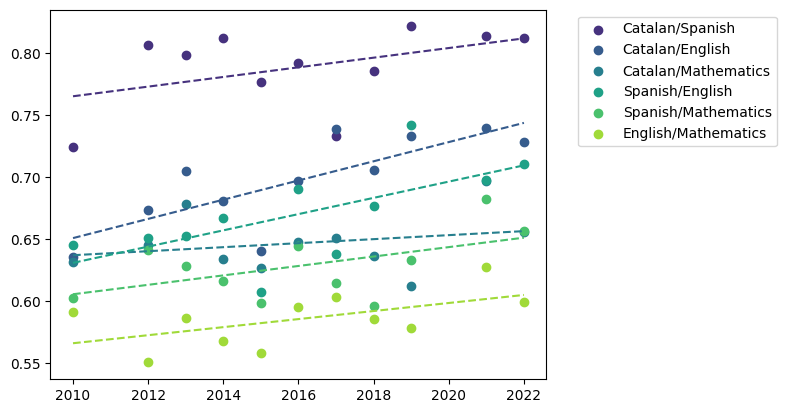

In [11]:
#Plot evolution of correlation for primary while removing 2011
condition = years != 2011
years = years[condition]
pf.plot_scatter_years(primary_df,fields,years,True,corr_type)


We can see however that, even taking this values away  the trend ar still positve.

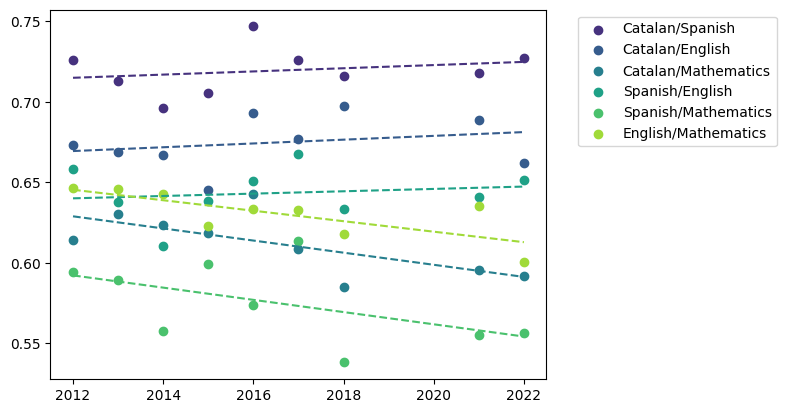

In [12]:
#Plot evolution of correlation for secondary
years = secondary_df['ANY'].unique()
condition = years != 2019
years = years[condition]
condition = years != 2020
years = years[condition]
pf.plot_scatter_years(secondary_df,fields,years,True,corr_type)

This graph shows the correlation between some subjects from 2012 to 2022,except for the years 2019 and 2020 for which data is missing, probably due to covid.
We can see a moderate decrease in correlation of english with other subjects. The correlation of other subjects among themselves shows a small increase.